### check the difference among different clades strain in different pathway's transcriptional level and CNV 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from scipy.stats import pearsonr
import random

os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database')

#### 1.check the correlationship between gene copy number and TPM

In [2]:
tpmMatrix=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/sce969_transcriptome_tpmMatrix.csv',index_col=0)
cnvMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_cnvMatrix.csv',index_col=0)
fc_metMatrix=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/sce969_transcriptome_foldchange_mean.xlsx',index_col=0)

# remove .fa in cnvMatrix columns
cnvMatrix.columns=[i.replace('.fa','') for i in cnvMatrix.columns]

In [3]:
def tpm_to_foldchange(tpmMatrix):
    df_expression_log2=tpmMatrix.applymap(lambda x:math.log2(x+1))
    # reference: mean value for rows
    df_expression_log2_mean=df_expression_log2.apply(lambda x: x[x!=0].mean(),axis=1)
    df_expression_foldchange=df_expression_log2.apply(lambda x: x/df_expression_log2_mean,axis=0)
    # fill inf as 10, and nan as 0
    df_expression_foldchange.replace([np.inf, -np.inf], 10,inplace=True)
    df_expression_foldchange.fillna(0,inplace=True)
    return df_expression_foldchange


In [4]:
fcMatrix=tpm_to_foldchange(tpmMatrix)

In [5]:
# commonGenes=list(set(tpmMatrix.index).intersection(set(cnvMatrix.index)))
# commnonSamples=list(set(tpmMatrix.columns).intersection(set(cnvMatrix.columns)))
commonGenes=list(set(tpmMatrix.index).intersection(set(cnvMatrix.index)).intersection(set(fcMatrix.index)))
commnonSamples=list(set(tpmMatrix.columns).intersection(set(cnvMatrix.columns)).intersection(set(fcMatrix.columns)))
met_commonGenes=list(set(fc_metMatrix.index).intersection(set(cnvMatrix.index)))

tpmMatrix=tpmMatrix.loc[commonGenes,commnonSamples]
cnvMatrix=cnvMatrix.loc[commonGenes,commnonSamples]
fcMatrix=fcMatrix.loc[commonGenes,commnonSamples]
fc_metMatrix=fc_metMatrix.loc[met_commonGenes,commnonSamples]
cnv_metMatrix=cnvMatrix.loc[met_commonGenes,commnonSamples]
tpm_metMatrix=tpmMatrix.loc[met_commonGenes,commnonSamples]

In [6]:
mean_tpm=tpmMatrix.mean(axis=1)
mean_cnv=cnvMatrix.mean(axis=1)
cv_tpm=tpmMatrix.std(axis=1)/mean_tpm
cv_cnv=cnvMatrix.std(axis=1)/mean_cnv
mean_fc=fcMatrix.mean(axis=1)
cv_fc=fcMatrix.std(axis=1)/mean_fc
mean_fc_met=fc_metMatrix.mean(axis=1)
cv_fc_met=fc_metMatrix.std(axis=1)/mean_fc_met
mean_cnv_met=cnv_metMatrix.mean(axis=1)
cv_cnv_met=cnv_metMatrix.std(axis=1)/mean_cnv_met
mean_tpm_met=tpm_metMatrix.mean(axis=1)
cv_tpm_met=tpm_metMatrix.std(axis=1)/mean_tpm_met


# fill na with 0
cv_tpm=cv_tpm.fillna(0)
cv_cnv=cv_cnv.fillna(0)
cv_fc=cv_fc.fillna(0)
cv_fc_met=cv_fc_met.fillna(0)
cv_cnv_met=cv_cnv_met.fillna(0)
cv_tpm_met=cv_tpm_met.fillna(0)

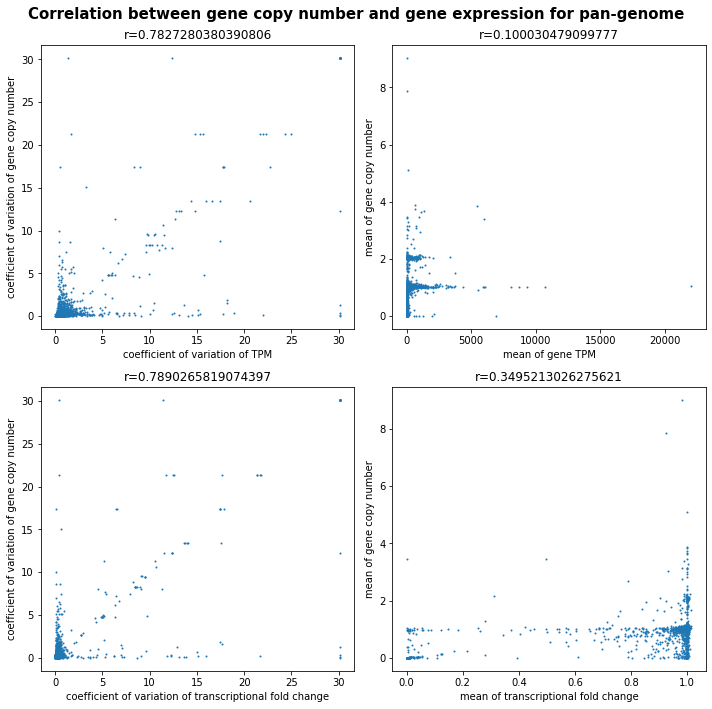

In [7]:
# calculate the pearson correlation coefficient
from scipy.stats import pearsonr
r_cv_tpm_cnv=pearsonr(cv_tpm,cv_cnv)
r_mean_tpm_cnv=pearsonr(mean_tpm,mean_cnv)
r_cv_fc_cnv=pearsonr(cv_fc,cv_cnv)
r_mean_fc_cnv=pearsonr(mean_fc,mean_cnv)

# plot the scatter plot for cv_tpm&cv_cnv, mean_tpm&mean_cnv ,calculate the correlation coefficient
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns,set()
ax[0,0].scatter(cv_tpm,cv_cnv,s=1)
ax[0,0].set_xlabel('coefficient of variation of TPM')
ax[0,0].set_ylabel('coefficient of variation of gene copy number')
ax[0,0].set_title('r=%s'%r_cv_tpm_cnv[0])
ax[0,1].scatter(mean_tpm,mean_cnv,s=1)
ax[0,1].set_xlabel('mean of gene TPM')
ax[0,1].set_ylabel('mean of gene copy number')
ax[0,1].set_title('r=%s'%r_mean_tpm_cnv[0])
ax[1,0].scatter(cv_fc,cv_cnv,s=1)
ax[1,0].set_xlabel('coefficient of variation of transcriptional fold change')
ax[1,0].set_ylabel('coefficient of variation of gene copy number')
ax[1,0].set_title('r=%s'%r_cv_fc_cnv[0])
ax[1,1].scatter(mean_fc,mean_cnv,s=1)
ax[1,1].set_xlabel('mean of transcriptional fold change')
ax[1,1].set_ylabel('mean of gene copy number')
ax[1,1].set_title('r=%s'%r_mean_fc_cnv[0])
fig.suptitle('Correlation between gene copy number and gene expression for pan-genome',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

- conclusion:
1. 不同基因的平均表达水平差异和基因拷贝数差异几乎没有相关性
2. 相同基因在不同菌株中的表达水平差异的变化和拷贝数变化的差异有着较强的相关性，r=0.78

d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\dis

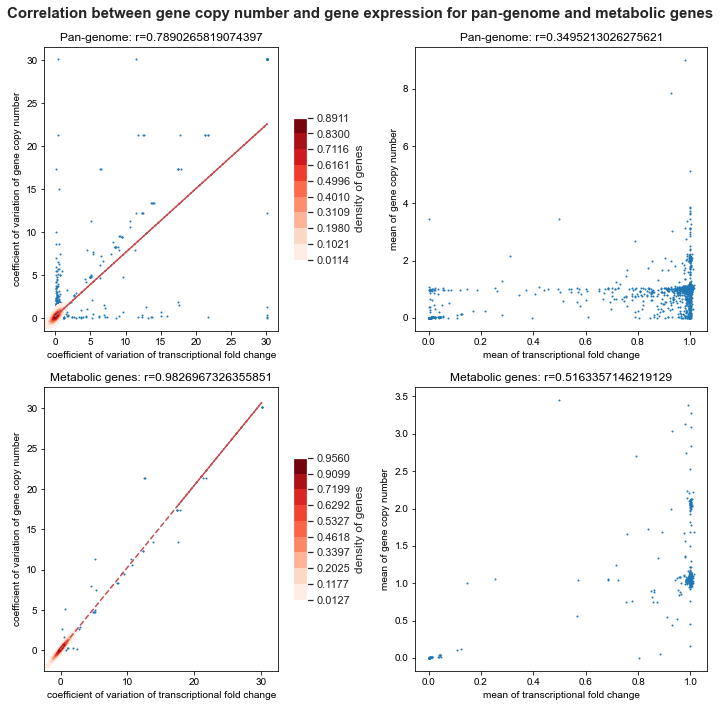

In [8]:
# calculate the pearson correlation coefficient to compare pan-genome and metabolic genes
from scipy.stats import pearsonr
r_cv_fc_cnv=pearsonr(cv_fc,cv_cnv)
r_mean_fc_cnv=pearsonr(mean_fc,mean_cnv)
r_met_cv_fc_cnv=pearsonr(cv_fc_met,cv_cnv_met)
r_met_mean_fc_cnv=pearsonr(mean_fc_met,mean_cnv_met)

# plot the scatter plot for cv_fc&cv_cnv, mean_fc&mean_cnv ,calculate the correlation coefficient, and show the density of point on the plot , and add the linear regression line for each plot
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.set()
ax[0,0].scatter(cv_fc,cv_cnv,s=1)
# add the density of points and colorbar
sns.kdeplot(cv_fc,cv_cnv,ax=ax[0,0],cmap='Reds',shade=True,shade_lowest=False,cbar=True,cbar_kws={'label':'density of genes','shrink':0.5,'aspect':10})
# add the linear regression line
z = np.polyfit(cv_fc,cv_cnv, 1)
p = np.poly1d(z)
ax[0,0].plot(cv_fc,p(cv_fc),"r--")
ax[0,0].set_xlabel('coefficient of variation of transcriptional fold change')
ax[0,0].set_ylabel('coefficient of variation of gene copy number')
ax[0,0].set_title('Pan-genome: r=%s'%r_cv_fc_cnv[0])
ax[0,1].scatter(mean_fc,mean_cnv,s=1)
ax[0,1].set_xlabel('mean of transcriptional fold change')
ax[0,1].set_ylabel('mean of gene copy number')
ax[0,1].set_title('Pan-genome: r=%s'%r_mean_fc_cnv[0])
ax[1,0].scatter(cv_fc_met,cv_cnv_met,s=1)
# add the density of points and colorbar
sns.kdeplot(cv_fc_met,cv_cnv_met,ax=ax[1,0],cmap='Reds',shade=True,shade_lowest=False,cbar=True,cbar_kws={'label':'density of genes','shrink':0.5,'aspect':10})
# add the linear regression line
z = np.polyfit(cv_fc_met,cv_cnv_met, 1)
p = np.poly1d(z)
# add the linear regression line with black dash line
ax[1,0].plot(cv_fc_met,p(cv_fc_met),"r--")
ax[1,0].set_xlabel('coefficient of variation of transcriptional fold change')
ax[1,0].set_ylabel('coefficient of variation of gene copy number')
ax[1,0].set_title('Metabolic genes: r=%s'%r_met_cv_fc_cnv[0])
ax[1,1].scatter(mean_fc_met,mean_cnv_met,s=1)
ax[1,1].set_xlabel('mean of transcriptional fold change')
ax[1,1].set_ylabel('mean of gene copy number')
ax[1,1].set_title('Metabolic genes: r=%s'%r_met_mean_fc_cnv[0])
fig.suptitle('Correlation between gene copy number and gene expression for pan-genome and metabolic genes',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\dis

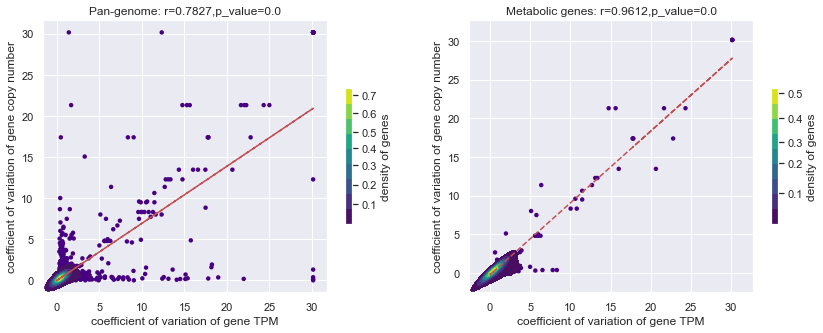

In [9]:
# calculate the pearson correlation coefficient to compare pan-genome and metabolic genes
from scipy.stats import pearsonr
r_cv_tpm_cnv=pearsonr(cv_tpm,cv_cnv)
r_cv_tpm_cnv_met=pearsonr(cv_tpm_met,cv_cnv_met)

# plot scatter plot to compare the correlation coefficient of TPM with CNV for pan-genome and metabolic genes
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.set()
# set the colorbar parameters,range:0-1, and set the xticks
cbar_paras={'label':'density of genes','shrink':0.5,'ticks':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
# set the colorbar parameters,range:0-1, and set the xticks
ax[0].scatter(cv_tpm,cv_cnv,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
sns.kdeplot(cv_tpm,cv_cnv,ax=ax[0],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_tpm,cv_cnv, 1)
p = np.poly1d(z)
# add the linear regression line with black dash line
ax[0].plot(cv_tpm,p(cv_tpm),"r--")
ax[0].set_xlabel('coefficient of variation of gene TPM')
ax[0].set_ylabel('coefficient of variation of gene copy number')
ax[0].set_title('Pan-genome: r=%.4f,p_value=%s'%(r_cv_tpm_cnv[0],r_cv_tpm_cnv[1]))
ax[1].scatter(cv_tpm_met,cv_cnv_met,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
sns.kdeplot(cv_tpm_met,cv_cnv_met,ax=ax[1],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_tpm_met,cv_cnv_met, 1)
p = np.poly1d(z)
ax[1].plot(cv_tpm_met,p(cv_tpm_met),"r--",zorder=3)
ax[1].set_xlabel('coefficient of variation of gene TPM')
ax[1].set_ylabel('coefficient of variation of gene copy number')
ax[1].set_title('Metabolic genes: r=%.4f,p_value=%s'%(r_cv_tpm_cnv_met[0],r_cv_tpm_cnv_met[1]))
plt.show()


In [11]:
# save cv_tpm ,cv_cnv ,cv_tpm_met ,cv_cnv_met
cv_tpm.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_tpm.csv')
cv_cnv.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_cnv.csv')
cv_tpm_met.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_tpm_met.csv')
cv_cnv_met.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_cnv_met.csv')

- conclusion:在 gene family level, 基因拷贝数变异程度同转录水平表达程度高度相关。
1. 代谢相关基因的表达变化与基因拷贝数变化的相关性更强。
2. 代谢相关基因在菌株层面，其转录水平的表达差异同拷贝数变化差异有着直接很强的相关性(r=0.98)，说明转录水平差异主要由拷贝数变化导致。(discussion: 根据拷贝数变化预测基因表达水平:深度学习: input:拷贝数信息+reference transcriptional abundance)

In [12]:
# transform 2 dimension data to 1 dimension data for tpmMatrix and cnvMatrix
tpmMatrix_1d=tpmMatrix.stack().reset_index()
tpmMatrix_1d.columns=['gene','sample','tpm']
cnvMatrix_1d=cnvMatrix.stack().reset_index()
cnvMatrix_1d.columns=['gene','sample','cnv']
fcMatrix_1d=fcMatrix.stack().reset_index()
fcMatrix_1d.columns=['gene','sample','fc']
cnv_metMatrix_1d=cnv_metMatrix.stack().reset_index()
cnv_metMatrix_1d.columns=['gene','sample','cnv']
fc_metMatrix_1d=fc_metMatrix.stack().reset_index()
fc_metMatrix_1d.columns=['gene','sample','fc']
tpm_metMatrix_1d=tpm_metMatrix.stack().reset_index()
tpm_metMatrix_1d.columns=['gene','sample','tpm']

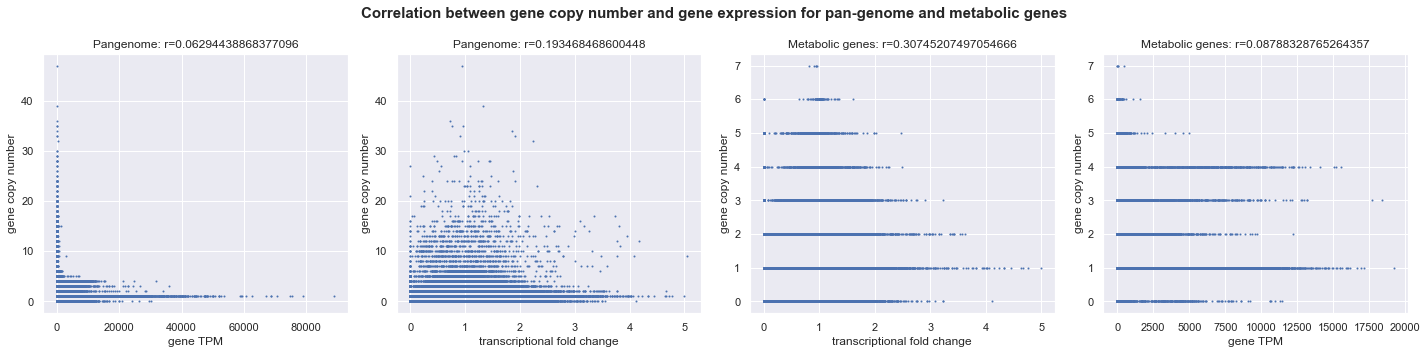

In [13]:
# calculate the pearson correlation coefficient
r_tpm_cnv=pearsonr(tpmMatrix_1d['tpm'],cnvMatrix_1d['cnv'])
r_fc_cnv=pearsonr(fcMatrix_1d['fc'],cnvMatrix_1d['cnv'])
r_met_fc_cnv=pearsonr(fc_metMatrix_1d['fc'],cnv_metMatrix_1d['cnv'])
r_met_tpm_cnv=pearsonr(tpm_metMatrix_1d['tpm'],cnv_metMatrix_1d['cnv'])

# plot the scatter plot for tpm&cnv, fc&cnv ,calculate the correlation coefficient
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.set()
ax[0].scatter(tpmMatrix_1d['tpm'],cnvMatrix_1d['cnv'],s=1)
ax[0].set_xlabel('gene TPM')
ax[0].set_ylabel('gene copy number')
ax[0].set_title('Pangenome: r=%s'%r_tpm_cnv[0])
ax[1].scatter(fcMatrix_1d['fc'],cnvMatrix_1d['cnv'],s=1)
ax[1].set_xlabel('transcriptional fold change')
ax[1].set_ylabel('gene copy number')
ax[1].set_title('Pangenome: r=%s'%r_fc_cnv[0])
ax[2].scatter(fc_metMatrix_1d['fc'],cnv_metMatrix_1d['cnv'],s=1)
ax[2].set_xlabel('transcriptional fold change')
ax[2].set_ylabel('gene copy number')
ax[2].set_title('Metabolic genes: r=%s'%r_met_fc_cnv[0])
ax[3].scatter(tpm_metMatrix_1d['tpm'],cnv_metMatrix_1d['cnv'],s=1)
ax[3].set_xlabel('gene TPM')
ax[3].set_ylabel('gene copy number')
ax[3].set_title('Metabolic genes: r=%s'%r_met_tpm_cnv[0])
fig.suptitle('Correlation between gene copy number and gene expression for pan-genome and metabolic genes',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

- conclusion: 在 single gene level, 基因拷贝数差异同转录水平差异没有强相关性，可能不同基因家族，单个拷贝数对基因表达水平的贡献度是不同的（同启动子，终止子强弱有关），因此无法从整体探究基因拷贝数对转录水平影响的定量关系。

#### 2.calculate the correlation between TPM/flux at reaction level

In [14]:
#load data
rxn_tpmMatrix=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/sce969_rxn_tpmMatrix.csv',index_col=0)
rxn_cnvMatrix=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/sce1800_rxn_cnvMatrix.csv',index_col=0)
# pfba_fluxMatrix=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_v2_mean_ssGEMs_flux.xlsx',index_col=0)
# pfba_fluxMatrix=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/newmethod_tissGEMs_pfba_flux.csv',index_col=0)
# flux_fcMatrix=pfba_fluxMatrix
sample_fluxMatrix=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_v3_tissGEMs_sample_flux.csv',index_col=0)
# remove the columns with 0 value in growth rate
sample_fluxMatrix=sample_fluxMatrix.loc[:,sample_fluxMatrix.loc['growth']>0]
# fill the NaN value with 0
sample_fluxMatrix=sample_fluxMatrix.fillna(0)
# # fill all flux absolute value less than 0.0001 with 0
sample_fluxMatrix=sample_fluxMatrix.applymap(lambda x:0 if abs(x)<0.00001 else x)

# remove rows with all value 0
sample_fluxMatrix=sample_fluxMatrix.loc[(sample_fluxMatrix!=0).any(axis=1),:]

# only keep rows with all values >=0 or all values <=0
sample_fluxMatrix=sample_fluxMatrix.loc[(sample_fluxMatrix>=0).all(axis=1) | (sample_fluxMatrix<=0).all(axis=1),:]

# transferm to absolute value of flux
sample_fluxMatrix=sample_fluxMatrix.applymap(lambda x:abs(x))
sample_fluxMatrix

,CNF_4.re,ACS_2.re,CBA_3.re,YBK.re,ATP_4.re,AKT_4.re,BHP_4.re,YBH.re,CFR_3.re,CEB_3.re,...,CGG_4.re,BED_6.re,ACB_6.re,BFH_3.re,CIB_4.re,BCC_3.re,ACV_2.re,AQQ_4.re,AGV_2.re,AAQ_3.re
growth,0.087660,0.086963,0.088654,0.087623,0.092043,0.086672,0.088702,0.086799,0.086493,0.085618,...,0.087182,0.087853,0.087608,0.086782,0.086647,0.088492,0.086978,0.086142,0.086246,0.089985
r_0001,0.011503,0.013225,0.002795,0.032883,0.000175,0.000000,0.000904,0.000182,0.000402,0.001268,...,0.012739,0.018233,0.009005,0.210200,0.003040,0.000096,0.003469,0.000128,0.001182,0.002532
r_0002,0.000965,0.001534,0.000358,0.000702,0.000044,0.000077,0.000125,0.000076,0.000072,0.000078,...,0.002485,0.184134,0.003154,0.013256,0.001797,0.001272,0.000038,0.000010,0.000034,0.005865
r_0003,0.001243,0.000650,0.001464,0.000257,0.000000,0.007597,0.011179,0.001632,0.001278,0.003196,...,0.000772,0.000559,0.001795,0.000053,0.001833,0.000289,0.000766,0.003128,0.000000,0.006338
r_0004,0.000169,0.000094,0.006592,0.000015,0.001729,0.000531,0.000479,0.000000,0.000160,0.000013,...,0.000607,0.021388,0.000016,0.000022,0.000069,0.000115,0.000461,0.000052,0.000403,0.007848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_4610,0.006475,0.000046,0.009070,0.007765,0.009055,0.002512,0.005950,0.007201,0.003075,0.000000,...,0.002556,0.010187,0.005035,0.002282,0.005569,0.002244,0.003320,0.000165,0.000029,0.003180
r_4611,0.000000,0.000000,0.002104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000441,0.000000,...,0.000000,0.000766,0.000000,0.000556,0.000000,0.000000,0.001105,0.000000,0.000000,0.000000
r_4701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
r_4702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# calculate relative foldchange of transcriptional level
rxn_fcMatrix=tpm_to_foldchange(rxn_tpmMatrix)

# calculate relative foldchange of flux
flux_fcMatrix=tpm_to_foldchange(sample_fluxMatrix)
flux_fcMatrix

,CNF_4.re,ACS_2.re,CBA_3.re,YBK.re,ATP_4.re,AKT_4.re,BHP_4.re,YBH.re,CFR_3.re,CEB_3.re,...,CGG_4.re,BED_6.re,ACB_6.re,BFH_3.re,CIB_4.re,BCC_3.re,ACV_2.re,AQQ_4.re,AGV_2.re,AAQ_3.re
growth,1.007076,0.999398,1.018027,1.006667,1.055277,0.996191,1.018556,0.997583,0.994211,0.984560,...,1.001808,1.009207,1.006509,0.997398,0.995915,1.016242,0.999557,0.990335,0.991484,1.032669
r_0001,1.056058,1.213132,0.257730,2.987404,0.016158,0.000000,0.083409,0.016759,0.037148,0.117047,...,1.168803,1.668321,0.827782,17.615925,0.280236,0.008856,0.319737,0.011841,0.109082,0.233528
r_0002,0.262179,0.416679,0.097368,0.190807,0.011907,0.020989,0.034015,0.020575,0.019459,0.021094,...,0.674594,45.931464,0.855780,3.578824,0.487791,0.345460,0.010302,0.002837,0.009210,1.589317
r_0003,0.231036,0.120825,0.272080,0.047743,0.000000,1.407787,2.067943,0.303345,0.237640,0.593629,...,0.143497,0.103942,0.333586,0.009917,0.340736,0.053661,0.142468,0.580985,0.000000,1.175143
r_0004,0.110279,0.061435,4.288273,0.009711,1.127459,0.346560,0.312462,0.000000,0.104603,0.008253,...,0.395876,13.812324,0.010175,0.014329,0.044720,0.075200,0.301040,0.033994,0.262892,5.102504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_4610,1.343627,0.009531,1.879843,1.610300,1.876586,0.522245,1.234963,1.493768,0.639253,0.000000,...,0.531529,2.109969,1.045541,0.474640,1.156120,0.466688,0.690095,0.034376,0.006060,0.661059
r_4611,0.000000,0.000000,0.853448,0.000000,0.000000,0.000000,0.000000,0.000000,0.179254,0.000000,...,0.000000,0.311086,0.000000,0.225845,0.000000,0.000000,0.448450,0.000000,0.000000,0.000000
r_4701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
r_4702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
# remove columns with 0 in growth
# pfba_fluxMatrix=pfba_fluxMatrix.loc[:,pfba_fluxMatrix.loc['growth']>0]
# remove .xml in column names
flux_fcMatrix.columns=[i.strip('.xml') for i in flux_fcMatrix.columns]
# remove .fa in rxn_cnvMatrix column names
rxn_cnvMatrix.columns=[i.strip('.fa') for i in rxn_cnvMatrix.columns]

commonRxnLis=list(set(rxn_tpmMatrix.index)&set(rxn_cnvMatrix.index)&set(flux_fcMatrix.index))
commnonSamples=list(set(rxn_tpmMatrix.columns)&set(rxn_cnvMatrix.columns)&set(flux_fcMatrix.columns))
rxn_tpmMatrix=rxn_tpmMatrix.loc[commonRxnLis,commnonSamples]
rxn_cnvMatrix=rxn_cnvMatrix.loc[commonRxnLis,commnonSamples]
flux_fcMatrix=flux_fcMatrix.loc[commonRxnLis,commnonSamples]
rxn_fcMatrix=rxn_fcMatrix.loc[commonRxnLis,commnonSamples]

In [17]:
mean_flux=flux_fcMatrix.mean(axis=1)
mean_tpm=rxn_tpmMatrix.mean(axis=1)
mean_cnv=rxn_cnvMatrix.mean(axis=1)
mean_fc=rxn_fcMatrix.mean(axis=1)
cv_flux=flux_fcMatrix.std(axis=1)/flux_fcMatrix.mean(axis=1)
cv_tpm=rxn_tpmMatrix.std(axis=1)/rxn_tpmMatrix.mean(axis=1)
cv_cnv=rxn_cnvMatrix.std(axis=1)/rxn_cnvMatrix.mean(axis=1)
cv_fc=rxn_fcMatrix.std(axis=1)/rxn_fcMatrix.mean(axis=1)

# fill nan with 0
mean_flux=mean_flux.fillna(0)
mean_tpm=mean_tpm.fillna(0)
mean_cnv=mean_cnv.fillna(0)
mean_fc=mean_fc.fillna(0)
cv_flux=cv_flux.fillna(0)
cv_tpm=cv_tpm.fillna(0)
cv_cnv=cv_cnv.fillna(0)
cv_fc=cv_fc.fillna(0)

# remove index which with 1 value in mean_fc and mean_cnv
for rxn in mean_fc.index:
    if mean_cnv[rxn]==1 or mean_fc[rxn]==1:
        mean_fc=mean_fc.drop(rxn)
        mean_cnv=mean_cnv.drop(rxn)
        mean_flux=mean_flux.drop(rxn)
        mean_tpm=mean_tpm.drop(rxn)
        cv_fc=cv_fc.drop(rxn)
        cv_cnv=cv_cnv.drop(rxn)
        cv_flux=cv_flux.drop(rxn)
        cv_tpm=cv_tpm.drop(rxn)

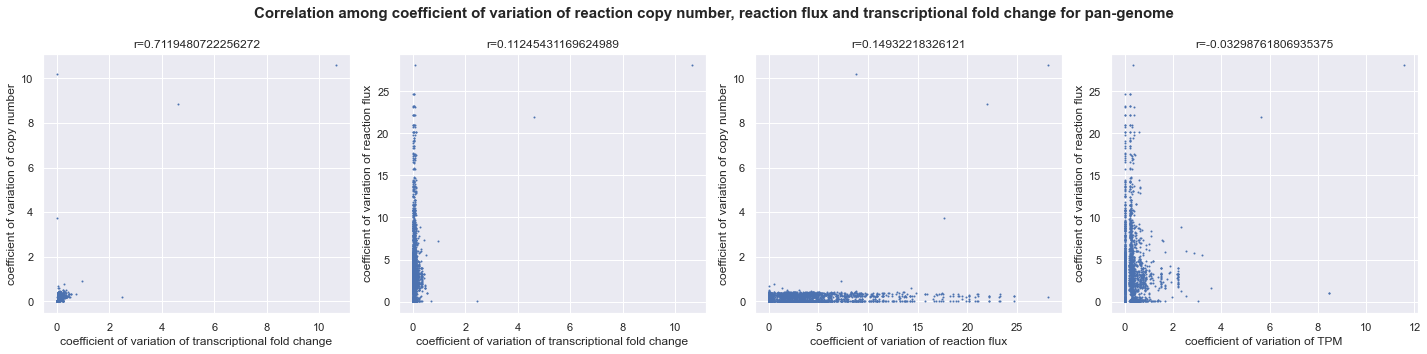

In [18]:
from scipy.stats import pearsonr
# calculate the pearson correlation coefficient
r_cv_fc_cnv=pearsonr(cv_fc,cv_cnv)
r_cv_fc_flux=pearsonr(cv_fc,cv_flux)
r_cv_flux_cnv=pearsonr(cv_flux,cv_cnv)
r_cv_tpm_flux=pearsonr(cv_tpm,cv_flux)


# plot the scatter plot for cv fc&cnv, cv fc&flux, cv tpm&flux, cv flux&cnv
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.set()
ax[0].scatter(cv_fc,cv_cnv,s=1)
ax[0].set_xlabel('coefficient of variation of transcriptional fold change')
ax[0].set_ylabel('coefficient of variation of copy number')
ax[0].set_title('r=%s'%r_cv_fc_cnv[0])
ax[1].scatter(cv_fc,cv_flux,s=1)
ax[1].set_xlabel('coefficient of variation of transcriptional fold change')
ax[1].set_ylabel('coefficient of variation of reaction flux')
ax[1].set_title('r=%s'%r_cv_fc_flux[0])
ax[2].scatter(cv_flux,cv_cnv,s=1)
ax[2].set_xlabel('coefficient of variation of reaction flux')
ax[2].set_ylabel('coefficient of variation of copy number')
ax[2].set_title('r=%s'%r_cv_flux_cnv[0])
ax[3].scatter(cv_tpm,cv_flux,s=1)
ax[3].set_xlabel('coefficient of variation of TPM')
ax[3].set_ylabel('coefficient of variation of reaction flux')
ax[3].set_title('r=%s'%r_cv_tpm_flux[0])
fig.suptitle('Correlation among coefficient of variation of reaction copy number, reaction flux and transcriptional fold change for pan-genome',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

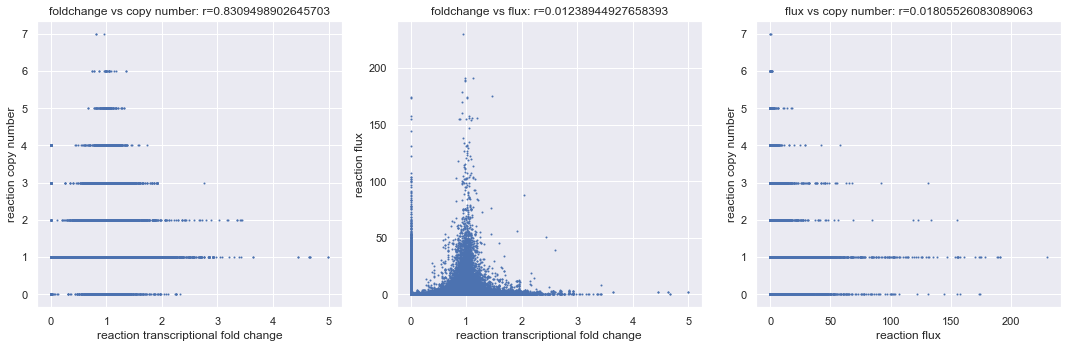

In [19]:
# transform 2 dimension data to 1 dimension data for rxn_fcMatrix, rxn_cnvMatrix, pfba_fluxMatrix
rxn_fcMatrix_1d=rxn_fcMatrix.stack().reset_index()
rxn_fcMatrix_1d.columns=['rxn','strain','fc']
rxn_cnvMatrix_1d=rxn_cnvMatrix.stack().reset_index()
rxn_cnvMatrix_1d.columns=['rxn','strain','cnv']
flux_fcMatrix_1d=flux_fcMatrix.stack().reset_index()
flux_fcMatrix_1d.columns=['rxn','strain','flux']


# calculate the pearson correlation coefficient for rxn_fcMatrix_1d, rxn_cnvMatrix_1d, pfba_fluxMatrix_1d
r_fc_cnv=pearsonr(rxn_fcMatrix_1d['fc'],rxn_cnvMatrix_1d['cnv'])
r_fc_flux=pearsonr(rxn_fcMatrix_1d['fc'],flux_fcMatrix_1d['flux'])
r_flux_cnv=pearsonr(flux_fcMatrix_1d['flux'],rxn_cnvMatrix_1d['cnv'])

# plot the scatter plot for rxn_fcMatrix_1d, rxn_cnvMatrix_1d, pfba_fluxMatrix_1d
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.set()
ax[0].scatter(rxn_fcMatrix_1d['fc'],rxn_cnvMatrix_1d['cnv'],s=1)
ax[0].set_xlabel('reaction transcriptional fold change')
ax[0].set_ylabel('reaction copy number')
ax[0].set_title('foldchange vs copy number: r=%s'%r_fc_cnv[0])
ax[1].scatter(rxn_fcMatrix_1d['fc'],flux_fcMatrix_1d['flux'],s=1)
ax[1].set_xlabel('reaction transcriptional fold change')
ax[1].set_ylabel('reaction flux')
ax[1].set_title('foldchange vs flux: r=%s'%r_fc_flux[0])
ax[2].scatter(flux_fcMatrix_1d['flux'],rxn_cnvMatrix_1d['cnv'],s=1)
ax[2].set_xlabel('reaction flux')
ax[2].set_ylabel('reaction copy number')
ax[2].set_title('flux vs copy number: r=%s'%r_flux_cnv[0])
plt.tight_layout()
plt.show()

In [20]:
# calculate the pearson correlation coefficient of TPM and flux for each reaction
# fill nan with 0 for rxn_tpmMatrix, pfba_fluxMatrix
rxn_fcMatrix=rxn_fcMatrix.fillna(1)
flux_fcMatrix=flux_fcMatrix.fillna(1)
# calculate the pearson correlation coefficient for rxn_fcMatrix, fluxMatrix for each reaction, if p value less than 0.05, set it as nan
r_tpm_flux=rxn_fcMatrix.apply(lambda x:pearsonr(x,flux_fcMatrix.loc[x.name])[0] if pearsonr(x,flux_fcMatrix.loc[x.name])[1]<0.05 else None,axis=1)
# r_tpm_flux=rxn_fcMatrix.apply(lambda x:pearsonr(x,flux_fcMatrix.loc[x.name])[0],axis=1)
# drop nan value
# r_tpm_flux=r_tpm_flux.dropna()
r_tpm_flux.describe()

d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


count    596.000000
mean       0.102930
std        0.262429
min       -0.578194
25%       -0.100953
50%        0.096164
75%        0.287883
max        0.831582
dtype: float64

In [21]:
# save r_tpm_flux
r_tpm_flux.to_csv(r'code/7.transcriptomics_ssGEMs_analysis/output/pearson_tpmfc_fluxfc.csv')

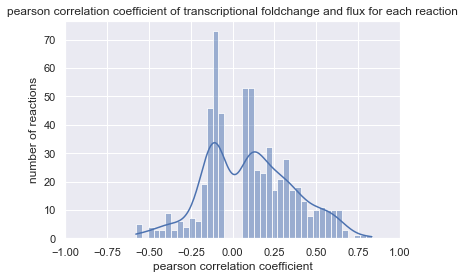

count    596.000000
mean       0.102930
std        0.262429
min       -0.578194
25%       -0.100953
50%        0.096164
75%        0.287883
max        0.831582
dtype: float64

In [22]:
# plot the kde and histogram for r_tpm_flux
sns.set()
sns.histplot(r_tpm_flux,kde=True,bins=40)
plt.xlabel('pearson correlation coefficient')
plt.ylabel('number of reactions')
plt.title('pearson correlation coefficient of transcriptional foldchange and flux for each reaction')
# set x axis limit
plt.xlim(-1,1)
plt.show()
r_tpm_flux.describe()

In [27]:
# check reaction with the abosolute value more than 0.6 
# sort the reaction by the value of pearson correlation coefficient
r_tpm_flux=r_tpm_flux.sort_values(ascending=False)
rxnList=r_tpm_flux[r_tpm_flux>0.7].index.tolist()

yeast8_data=pd.read_excel('model/yeast-GEM8.7.xlsx',sheet_name='RXNS')
# set ID as index
yeast8_data=yeast8_data.set_index('ID')

# get the reaction name and gene name for each reaction
for rxnID in rxnList:
    rxnName=yeast8_data.loc[rxnID,'NAME']
    rxnsubsytem=yeast8_data.loc[rxnID,'SUBSYSTEM']
    print('reaction ID: %s, reaction name: %s, reaction subsytem: %s'%(rxnID,rxnName,rxnsubsytem))

df_r_tpm_flux=pd.DataFrame(r_tpm_flux,columns=['pearson correlation coefficient'])
df_r_tpm_flux['rxnName']=df_r_tpm_flux.index.map(lambda x:yeast8_data.loc[x,'NAME'] if x in yeast8_data.index else 'None')
df_r_tpm_flux['subsystem']=df_r_tpm_flux.index.map(lambda x:yeast8_data.loc[x,'SUBSYSTEM'] if x in yeast8_data.index else 'None')
df_r_tpm_flux['p_value']=rxn_fcMatrix.apply(lambda x:pearsonr(x,flux_fcMatrix.loc[x.name])[1],axis=1)
df_r_tpm_flux
df_r_tpm_flux.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/pearson_tpmfc_fluxfc.csv')

reaction ID: r_0501, reaction name: glycine cleavage system, reaction subsytem: Glycine, serine and threonine metabolism
reaction ID: r_0491, reaction name: glycerol-3-phosphate dehydrogenase (NAD), reaction subsytem: Glycerophospholipid metabolism
reaction ID: r_1216, reaction name: L-proline transport, reaction subsytem: Transport [c, e]


d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


#### 3.compare the correlation between flux and transcription

In [49]:
import json
from cobra.io import read_sbml_model

# load data
with open('model/model_pathway_rxndict.json') as f:
    pathway_rxn_dict=json.load(f)

rxnList=r_tpm_flux.index.tolist()
# remove rxn that is not in rxnList
for pathway in pathway_rxn_dict.keys():
    pathway_rxn_dict[pathway]=[rxn for rxn in pathway_rxn_dict[pathway] if rxn in rxnList]

##### 3.1 check the average pearson coefficient of different pathway

In [55]:
# transfer the r value to abosolute value
# r_tpm_flux=abs(r_tpm_flux)
r_tpm_flux_glycolysis=r_tpm_flux[pathway_rxn_dict['Glycolysis']]
r_tpm_flux_tca=r_tpm_flux[pathway_rxn_dict['TCA cycle']]
r_tpm_flux_ppp=r_tpm_flux[pathway_rxn_dict['Pentose phosphate pathway']]
r_tpm_flux_op=r_tpm_flux[pathway_rxn_dict['Oxidative phosphorylation']]
r_tpm_flux_galactose=r_tpm_flux[pathway_rxn_dict['Galactose']]
r_tpm_flux_aa=r_tpm_flux[pathway_rxn_dict['Biosynthesis of amino acids']]
r_tpm_flux_secondary=r_tpm_flux[pathway_rxn_dict['Biosynthesis of secondary metabolites']]
r_tpm_flux_gly_down=r_tpm_flux[pathway_rxn_dict['Glycolysis_downstream']]
r_tpm_flux_gly_up=r_tpm_flux[pathway_rxn_dict['Glycolysis_upstream']]
r_tpm_flux_af=r_tpm_flux[pathway_rxn_dict['Anaerobic_fermentation']]
r_tpm_flux.describe()

count    596.000000
mean       0.102930
std        0.262429
min       -0.578194
25%       -0.100953
50%        0.096164
75%        0.287883
max        0.831582
dtype: float64

d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


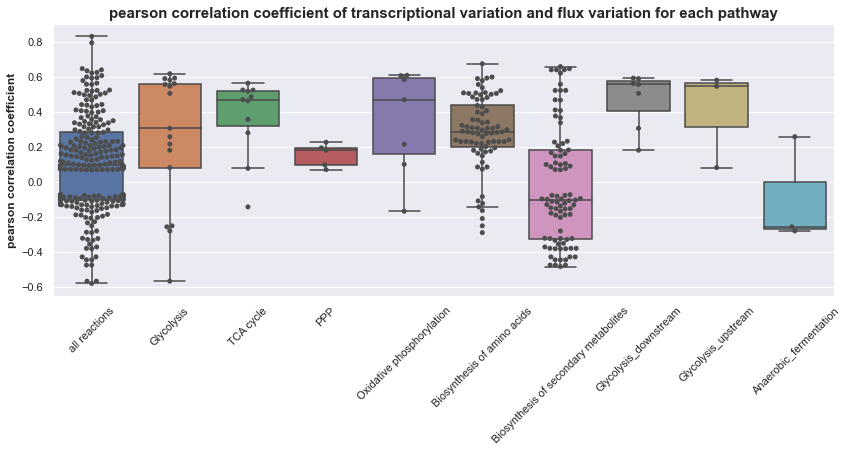

p value for glycolysis: nan
p value for TCA cycle: nan
p value for PPP: nan
p value for oxidative phosphorylation: nan
p value for galactose: nan
p value for amino acids: nan
p value for secondary metabolites: nan
p value for glycolysis downstream: nan
p value for glycolysis upstream: nan
p value for anaerobic fermentation: nan


In [56]:
# plot violin plot to compare the distribution of r_tpm_flux abosolute value for each pathway
# transform r_tpm_flux to absolute value
sns.set()
fig,ax=plt.subplots(1,1,figsize=(14,5))
# plot boxplot with observations points
sns.boxplot(data=[r_tpm_flux,r_tpm_flux_glycolysis,r_tpm_flux_tca,r_tpm_flux_ppp,r_tpm_flux_op,r_tpm_flux_aa,r_tpm_flux_secondary,r_tpm_flux_gly_down,r_tpm_flux_gly_up,r_tpm_flux_af],showfliers=False)
# add observations points
# random sample 100 points from r_tpm_flux
sns.swarmplot(data=[r_tpm_flux.sample(1000),r_tpm_flux_glycolysis,r_tpm_flux_tca,r_tpm_flux_ppp,r_tpm_flux_op,r_tpm_flux_aa,r_tpm_flux_secondary,r_tpm_flux_gly_down,r_tpm_flux_gly_up,r_tpm_flux_af],color='.3',size=5)
ax.set_xticklabels(['all reactions','Glycolysis','TCA cycle','PPP','Oxidative phosphorylation','Biosynthesis of amino acids','Biosynthesis of secondary metabolites','Glycolysis_downstream','Glycolysis_upstream','Anaerobic_fermentation'],rotation=45)
ax.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
ax.set_title('pearson correlation coefficient of transcriptional variation and flux variation for each pathway',fontsize=15,fontweight='bold')
plt.show()

# calculate the p value for each pathway compared to all reactions
from scipy.stats import ttest_ind
p_tpm_flux_glycolysis=ttest_ind(r_tpm_flux,r_tpm_flux_glycolysis)[1]
p_tpm_flux_tca=ttest_ind(r_tpm_flux,r_tpm_flux_tca)[1]
p_tpm_flux_ppp=ttest_ind(r_tpm_flux,r_tpm_flux_ppp)[1]
p_tpm_flux_op=ttest_ind(r_tpm_flux,r_tpm_flux_op)[1]
p_tpm_flux_galactose=ttest_ind(r_tpm_flux,r_tpm_flux_galactose)[1]
p_tpm_flux_aa=ttest_ind(r_tpm_flux,r_tpm_flux_aa)[1]
p_tpm_flux_secondary=ttest_ind(r_tpm_flux,r_tpm_flux_secondary)[1]
p_tpm_flux_gly_down=ttest_ind(r_tpm_flux,r_tpm_flux_gly_down)[1]
p_tpm_flux_gly_up=ttest_ind(r_tpm_flux,r_tpm_flux_gly_up)[1]
p_tpm_flux_af=ttest_ind(r_tpm_flux,r_tpm_flux_af)[1]

print('p value for glycolysis: %s'%p_tpm_flux_glycolysis)
print('p value for TCA cycle: %s'%p_tpm_flux_tca)
print('p value for PPP: %s'%p_tpm_flux_ppp)
print('p value for oxidative phosphorylation: %s'%p_tpm_flux_op)
print('p value for galactose: %s'%p_tpm_flux_galactose)
print('p value for amino acids: %s'%p_tpm_flux_aa)
print('p value for secondary metabolites: %s'%p_tpm_flux_secondary)
print('p value for glycolysis downstream: %s'%p_tpm_flux_gly_down)
print('p value for glycolysis upstream: %s'%p_tpm_flux_gly_up)
print('p value for anaerobic fermentation: %s'%p_tpm_flux_af)

- conclusion:
Oxodative phosphorylation and TCA cycle and Biosynthesis of amino acids show a higher correlation for the TPM and flux

#### 4.Compare different clades' correlation between flux and transcription

In [77]:
# load all strain info
df_strain_info=pd.read_excel(r'data\1897_strains_info.xlsx',index_col=0)

# remove rows with NaN value in nature_clade
df_strain_info=df_strain_info[~df_strain_info['nature_clade'].isna()]

# only keep strain that exist in rxn_fcMatrix columns
df_strain_info=df_strain_info.loc[df_strain_info.index.isin(rxn_fcMatrix.columns)]
df_strain_info['nature_clade'].value_counts()

1. Wine/European                 245
M3. Mosaic region 3               78
25. Sake                          45
1. Wine/European (subclade 4)     35
26. Asian fermentation            30
3. Brazilian bioethanol           29
13. African palm wine             27
10. French Guiana human           26
8. Mixed origin                   23
1. Wine/European (subclade 3)     21
5. French dairy                   20
1. Wine/European (subclade 1)     17
M2. Mosaic region 2               17
7. Mosaic beer                    16
12. West African cocoa            13
1. Wine/European (subclade 2)     13
M1. Mosaic region 1               12
23. North American oak            12
M3. Mosaic region 3               10
18. Far East Asia                  9
21. Ecuadorean                     8
24. Asian islands                  8
9. Mexican agave                   6
6. African beer                    6
4. Mediterranean oak               5
22. Far East Russian               4
17. Taiwanese                      3
1

In [78]:
# # Filter by ecological niche 
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='25. Sake ')&(df_strain_info['sub_type']!='Sake'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European (subclade 4) ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='3. Brazilian bioethanol ')&(df_strain_info['sub_type']!='Bioethanol'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='13. African palm wine ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='10. French Guiana human ')&(df_strain_info['sub_type']!='Human'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European (subclade 3) ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='5. French dairy ')&(df_strain_info['sub_type']!='Dairy'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European (subclade 1) ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='7. Mosaic beer ')&(df_strain_info['sub_type']!='Beer'))]

In [79]:
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
# only keep clades with more than 10 strains
check_cladelist=df_strain_info['nature_clade'].value_counts()[df_strain_info['nature_clade'].value_counts()>10].index.tolist()
wt_strainlist=df_strain_info[df_strain_info['nature_clade'].isin(wildtypelist)].index.tolist()
check_clades_dict=dict()
# sample 20 strains from wildtype
random.seed(123)
wt_strainlist=random.sample(wt_strainlist,20)
check_clades_dict['wildtype']=wt_strainlist
print('wildtype',len(set(wt_strainlist)))
for clade in check_cladelist:
    strainlist=df_strain_info[df_strain_info['nature_clade']==clade].index.tolist()
    if len(strainlist)<15:
        continue
    else:
        # sample 20 strains from each clade
        random.seed(123)
        strainlist=random.sample(strainlist,15)
    check_clades_dict[clade]=strainlist
    print(clade,len(set(strainlist)))

wildtype 20
1. Wine/European  15
M3. Mosaic region 3 15
25. Sake  15
1. Wine/European (subclade 4) 15
26. Asian fermentation  15
8. Mixed origin  15
13. African palm wine  15
10. French Guiana human  15
3. Brazilian bioethanol  15
1. Wine/European (subclade 3) 15
5. French dairy  15
1. Wine/European (subclade 1) 15
M2. Mosaic region 2 15


In [80]:
def calculate_clade_corr_tpm_flux(clade_strainlist,rxn_fcMatrix,rxn_fluxMatrix):
    clade_rxn_fcMatrix=rxn_fcMatrix[clade_strainlist]
    clade_rxn_fluxMatrix=rxn_fluxMatrix[clade_strainlist]
    # calculate the pearson correlation coefficient for rxn_fcMatrix, pfba_fluxMatrix for each reaction ,if p value more than 0.05, set r value to 0
    clade_r_tpm_flux=clade_rxn_fcMatrix.apply(lambda x:pearsonr(x,clade_rxn_fluxMatrix.loc[x.name])[0] if pearsonr(x,clade_rxn_fluxMatrix.loc[x.name])[1]<0.01 else None,axis=1)
    # clade_r_tpm_flux=clade_rxn_fcMatrix.apply(lambda x:pearsonr(x,clade_rxn_fluxMatrix.loc[x.name])[0],axis=1)
    # fill nan with 0
    clade_r_tpm_flux=clade_r_tpm_flux.fillna(0)

    return clade_r_tpm_flux

In [81]:
df_clades_corr_tpm_flux=pd.DataFrame(index=rxn_fcMatrix.index)
wt_r_tpm_flux=calculate_clade_corr_tpm_flux(wt_strainlist,rxn_fcMatrix,sample_fluxMatrix)
df_clades_corr_tpm_flux['wildtype']=wt_r_tpm_flux
for clade in check_clades_dict.keys():
    strainlist=check_clades_dict[clade]
    clade_r_tpm_flux=calculate_clade_corr_tpm_flux(strainlist,rxn_fcMatrix,sample_fluxMatrix)
    df_clades_corr_tpm_flux[clade]=clade_r_tpm_flux

# remove rows with all 0 value
df_clades_corr_tpm_flux=df_clades_corr_tpm_flux.loc[~(df_clades_corr_tpm_flux<=0.05).all(axis=1)]

# only keep rows with any value > 0.5
df_clades_corr_tpm_flux=df_clades_corr_tpm_flux.loc[(df_clades_corr_tpm_flux>0.5).any(axis=1)]
df_clades_corr_tpm_flux

d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\softwares\programming\anocond

,wildtype,1. Wine/European,M3. Mosaic region 3,25. Sake,1. Wine/European (subclade 4),26. Asian fermentation,8. Mixed origin,13. African palm wine,10. French Guiana human,3. Brazilian bioethanol,1. Wine/European (subclade 3),5. French dairy,1. Wine/European (subclade 1),M2. Mosaic region 2
r_2333,0.000000,0.000000,0.774542,0.000000,0.000000,0.000000,0.000000,0.722792,0.753287,0.758300,0.000000,0.000000,0.000000,0.000000
r_0215,0.630063,0.000000,0.000000,0.000000,0.695733,0.741999,0.804739,0.000000,0.698956,0.000000,0.000000,0.721558,0.000000,0.000000
r_0352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.641591,0.000000,0.671809,0.000000,0.000000,0.000000,0.000000,0.000000
r_1805,0.000000,0.000000,0.684609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
r_1127,0.000000,0.000000,0.000000,0.000000,0.677495,0.000000,0.000000,0.000000,0.000000,0.690847,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_2508,0.751585,0.750297,0.763518,0.706176,0.000000,0.848232,0.694152,0.728538,0.000000,0.000000,0.885880,0.000000,0.000000,0.819552
r_0888,0.000000,0.708134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
r_0491,0.825363,0.000000,0.725468,0.000000,0.833159,0.790913,0.000000,0.819731,0.000000,0.762924,0.758477,0.871590,0.870121,0.700361
r_0805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
# save result
df_clades_corr_tpm_flux.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_clades_pearson_tpm_flux.csv')

1. Wine/European  0.06674220135502816
M3. Mosaic region 3 0.9097261613692976
25. Sake  0.36972315869051786
1. Wine/European (subclade 4) 0.4014274834684931
26. Asian fermentation  0.6730760262722262
8. Mixed origin  0.3667474238627664
13. African palm wine  0.553809186966469
10. French Guiana human  0.0016369550969210771
3. Brazilian bioethanol  9.687788417909843e-05
1. Wine/European (subclade 3) 0.8536001593671393
5. French dairy  0.586724037910981
1. Wine/European (subclade 1) 0.604750592288875
M2. Mosaic region 2 0.48963492346273263


d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


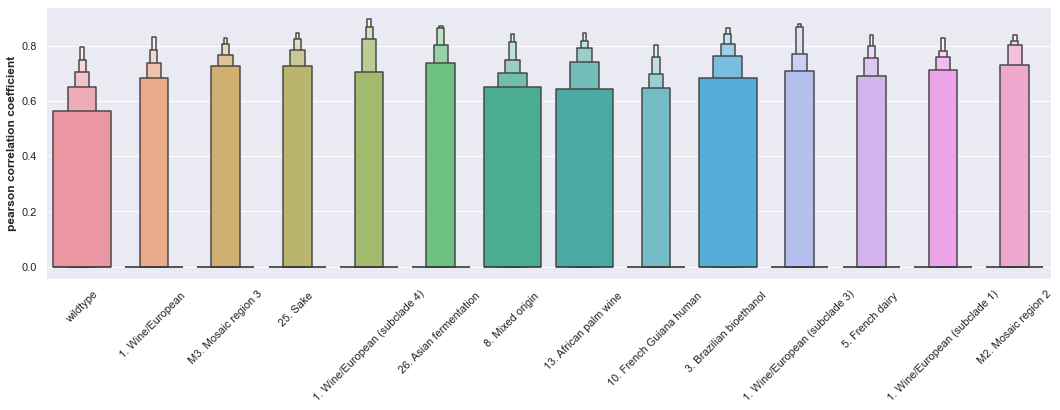

In [82]:
# calculate each columns p value compared to the first column
from scipy.stats import ttest_ind
for clade in df_clades_corr_tpm_flux.columns[1:]:
    print(clade,ttest_ind(df_clades_corr_tpm_flux['wildtype'],df_clades_corr_tpm_flux[clade])[1])

# plot boxplot to compare the distribution of r_tpm_flux abosolute value for each clade
sns.set()
fig,ax=plt.subplots(1,1,figsize=(18,5))
# plot violinplot with absolute value
sns.boxenplot(data=df_clades_corr_tpm_flux,ax=ax,showfliers=False)
# rotate x axis label
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# set y axis label
ax.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
plt.show()

##### 4.1 pathway flux-transcription correlation comparison for different clades

In [83]:
def calculate_pathway_tmp_flux_corr(pathway_rxn_dict,df_corr_tpm_flux):
    df_pathway_mean_corr=pd.Series()
    for pathway,rxnlist in pathway_rxn_dict.items():
        rxnlist=[rxn for rxn in rxnlist if rxn in df_corr_tpm_flux.index.tolist()]
        if len(rxnlist)<3:
            continue
        df_pathway_corr_tpm_flux=df_corr_tpm_flux[rxnlist]

        # use the mean of r value as the pathway r value
        mean_corr=df_pathway_corr_tpm_flux.mean()
        df_pathway_mean_corr[pathway]=mean_corr

        # use the max of r value as the pathway r value
        # max_corr=df_pathway_corr_tpm_flux.max()
        # df_pathway_mean_corr[pathway]=max_corr

    return df_pathway_mean_corr


In [84]:
# load pathway rxn dict
df_yeast8=pd.read_excel('model/yeast-GEM8.7.xlsx',sheet_name='RXNS')
# remove NaN value in subsystem
df_yeast8=df_yeast8[~df_yeast8['SUBSYSTEM'].isna()]
# groupby subsystem
pathway_rxn_dict=df_yeast8.groupby('SUBSYSTEM')['ID'].apply(list).to_dict()

In [85]:
# modify pathway_rxn_dict
#1. merge all transport reaction into one pathway named Transport
pathway_rxn_dict['Transport']=[]
pathway_list=list(pathway_rxn_dict.keys())
for pathway in pathway_list:
    if 'Transport' in pathway:
        rxnlist=pathway_rxn_dict[pathway]
        pathway_rxn_dict['Transport']=pathway_rxn_dict['Transport']+rxnlist
        pathway_rxn_dict.pop(pathway)


In [86]:
df_clades_pathway_mean_corr=pd.DataFrame(index=pathway_rxn_dict.keys())
for clade in df_clades_corr_tpm_flux.columns:
    df_clades_pathway_mean_corr[clade]=calculate_pathway_tmp_flux_corr(pathway_rxn_dict,df_clades_corr_tpm_flux[clade])

# remove rows with all Nan value
df_clades_pathway_mean_corr=df_clades_pathway_mean_corr.dropna(axis=0,how='all')
df_clades_pathway_mean_corr=df_clades_pathway_mean_corr.fillna(0)
df_clades_pathway_mean_corr

C:\Users\wangh\AppData\Local\Temp\ipykernel_32112\3298631080.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_pathway_mean_corr=pd.Series()
C:\Users\wangh\AppData\Local\Temp\ipykernel_32112\3298631080.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_pathway_mean_corr=pd.Series()
C:\Users\wangh\AppData\Local\Temp\ipykernel_32112\3298631080.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_pathway_mean_corr=pd.Series()
C:\Users\wangh\AppData\Local\Temp\ipykernel_32112\3298631080.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silen

,wildtype,1. Wine/European,M3. Mosaic region 3,25. Sake,1. Wine/European (subclade 4),26. Asian fermentation,8. Mixed origin,13. African palm wine,10. French Guiana human,3. Brazilian bioethanol,1. Wine/European (subclade 3),5. French dairy,1. Wine/European (subclade 1),M2. Mosaic region 2
"Alanine, aspartate and glutamate metabolism",0.185951,0.000000,0.183152,0.000000,0.000000,0.326510,0.178844,0.552591,0.175254,0.577504,0.164864,0.000000,0.000000,0.000000
Arginine biosynthesis,0.535689,0.420663,0.000000,0.628101,0.513534,0.167252,0.536428,0.354983,0.364701,0.369925,0.167150,0.000000,0.503745,0.554456
Biosynthesis of unsaturated fatty acids,0.000000,0.065220,0.064280,0.000000,0.000000,0.063458,0.058365,0.000000,0.065954,0.379820,0.059490,-0.062581,0.058587,0.000000
Citrate cycle (TCA cycle),0.346852,0.484810,0.162275,0.090085,0.549382,0.092472,0.000000,0.000000,0.000000,0.082335,0.515783,0.182025,0.165091,0.094970
Complex alcohol metabolism,0.190846,0.214123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217184,0.000000,0.000000,0.249062
Cysteine and methionine metabolism,0.000000,0.263322,0.140189,0.000000,0.128413,0.130440,0.143756,0.000000,0.000000,0.135089,0.000000,0.000000,0.288944,0.130916
Glycerolipid metabolism,0.082493,0.092697,0.279955,0.042249,0.094726,0.000000,0.100356,0.094283,0.050219,0.050553,0.229693,0.091227,0.107676,0.147004
Glycerophospholipid metabolism,0.295719,0.166553,0.202391,0.283741,0.118033,0.154584,0.265281,0.219714,0.060678,0.324616,0.279534,0.147212,0.228468,0.146328
"Glycine, serine and threonine metabolism",0.286697,0.213955,0.067154,0.155860,0.208654,0.171530,0.381284,0.109270,0.198853,0.276923,0.270858,0.152235,0.219801,0.210149
Glycolysis / gluconeogenesis,0.267594,0.213565,0.291847,0.226289,0.577256,0.276581,0.182273,0.398322,0.307869,0.287283,0.364244,0.318354,0.390585,0.363599


In [ ]:
# save result
df_clades_pathway_mean_corr.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_clades_pathway_mean_pearson_tpm_flux.csv')

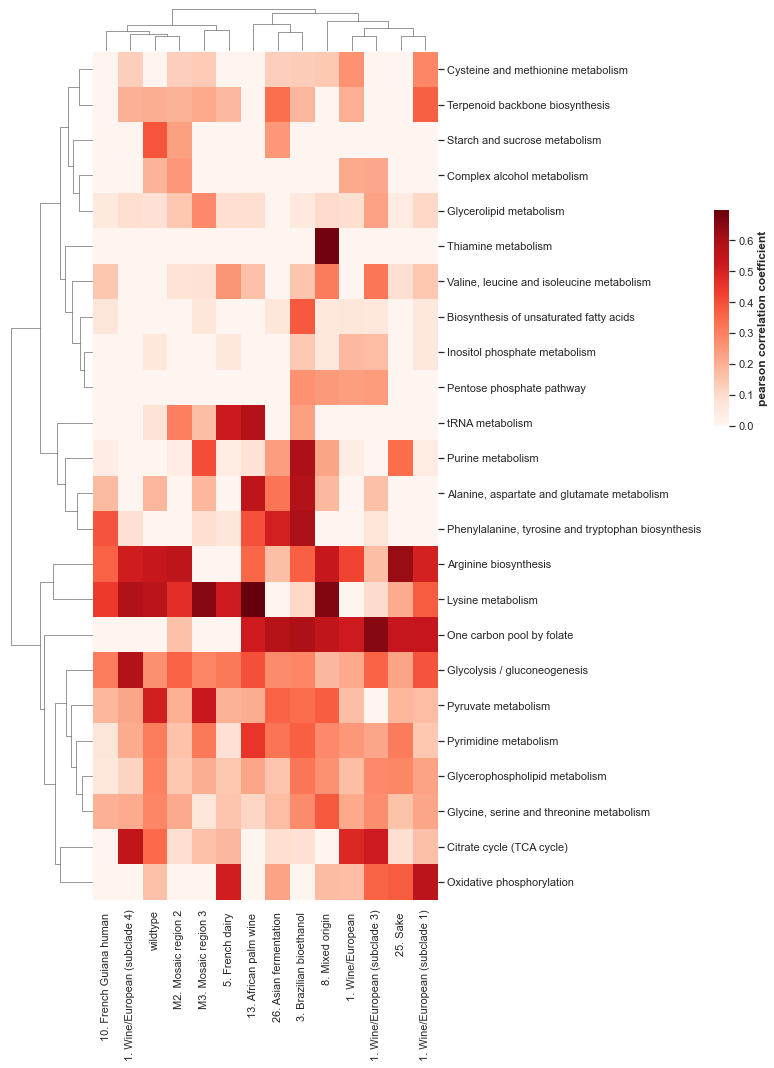

In [87]:
# plot cluster map for df_clades_pathway_mean_corr
sns.clustermap(data=df_clades_pathway_mean_corr,
               figsize=(10,15),
               vmin=0,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(.2, .05),
               )

# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
# set location of colorbar
cbar.set_position([1, .6, .02, .20])

# set title
# plt.title('Different clades correlation between transcription and flux for different pathways',fontsize=15,fontweight='bold')
plt.show()

#### 5.different growth type strains flux-transcription regulation comparison
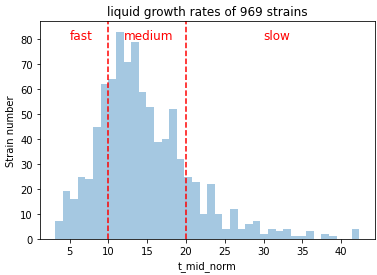

In [88]:
# df_strain_info
# slow_strainlist=df_strain_info[df_strain_info['growth_type']=='slow'].index.tolist()
# fast_strainlist=df_strain_info[df_strain_info['growth_type']=='fast'].index.tolist()
# medium_strainlist=df_strain_info[df_strain_info['growth_type']=='medium'].index.tolist()

# # random sample 40 strains from each group
# random.seed(123)
# slow_strainlist=random.sample(slow_strainlist,40)
# fast_strainlist=random.sample(fast_strainlist,40)
# medium_strainlist=random.sample(medium_strainlist,40)

In [118]:
df_growth_data=pd.read_csv('data/transcriptomics/combined_969growth_data.csv',index_col=0)
# remove rows with genome_id is NaN
df_growth_data=df_growth_data[df_growth_data['genome_id'].notnull()]
#set genome_id as index
df_growth_data=df_growth_data.set_index('genome_id')

# only keep strains exist in rxn_fcMatrix column and df_strain_info index
keep_strainlist=list(set(rxn_fcMatrix.columns.tolist()).intersection(set(df_strain_info.index.tolist())))
df_growth_data=df_growth_data[df_growth_data.index.isin(keep_strainlist)]

# sort by t_mid_norm
df_growth_data=df_growth_data.sort_values(by=['t_mid_norm'])

# extract top 50 as fast , bottom 50 as slow, and middle 50 as medium
fast_strainlist=df_growth_data.index[:50].tolist()
medium_strainlist=df_growth_data.index[325:375].tolist()
slow_strainlist=df_growth_data.index[-50:].tolist()

In [139]:
# calculate the different growth type strains correlation between transcription and flux
df_growth_type_corr_tpm_flux=pd.DataFrame(index=rxn_fcMatrix.index)
df_growth_type_corr_tpm_flux['slow']=calculate_clade_corr_tpm_flux(slow_strainlist,rxn_fcMatrix,sample_fluxMatrix)
df_growth_type_corr_tpm_flux['medium']=calculate_clade_corr_tpm_flux(medium_strainlist,rxn_fcMatrix,sample_fluxMatrix)
df_growth_type_corr_tpm_flux['fast']=calculate_clade_corr_tpm_flux(fast_strainlist,rxn_fcMatrix,sample_fluxMatrix)

# remove rxns with all value less than 0
df_growth_type_corr_tpm_flux=df_growth_type_corr_tpm_flux[(df_growth_type_corr_tpm_flux>0).any(axis=1)]
df_growth_type_corr_tpm_flux

d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\softwares\programming\anoconda\envs\why\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,slow,medium,fast
r_2333,0.407949,0.371156,0.000000
r_0215,0.470297,0.433365,0.000000
r_1127,0.477863,0.441218,0.626376
r_0018,0.599983,0.374384,0.544377
r_0453,0.447060,0.409951,0.390188
...,...,...,...
r_2500,0.670724,0.709241,0.673173
r_0669,0.414217,0.462548,0.000000
r_2508,0.670724,0.709241,0.673173
r_2883,0.000000,0.000000,0.392315


In [146]:
# save df_growth_type_corr_tpm_flux
df_growth_type_corr_tpm_flux.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_growth_type_pearson_tpm_flux.csv')


slow 0.03218206358635666
medium 1.0
fast 0.11880013024791207


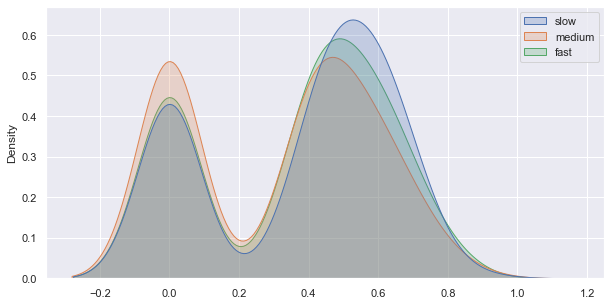

In [147]:
# calculate the p value for each growth types compare to medium growth type
from scipy.stats import ttest_ind
for growth_type in df_growth_type_corr_tpm_flux.columns:
    print(growth_type,ttest_ind(df_growth_type_corr_tpm_flux['medium'],df_growth_type_corr_tpm_flux[growth_type])[1])
# plot histogram to compare the distribution of correlation coefficient for each growth type
sns.set()
fig,ax=plt.subplots(1,1,figsize=(10,5))
# plot kde plot
sns.kdeplot(data=df_growth_type_corr_tpm_flux.loc[~(df_growth_type_corr_tpm_flux==0).all(axis=1)],shade=True,ax=ax)
# set y limit
# plt.ylim(0,200)
plt.show()

slow 0.03218206358635666
medium 1.0
fast 0.11880013024791207


d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


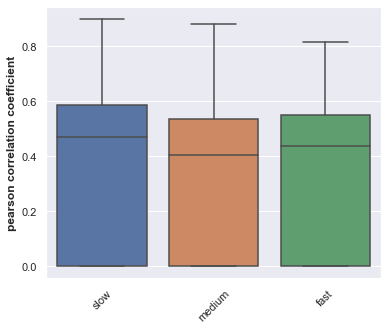

In [142]:
# calculate the p value for each growth types compare to medium growth type
from scipy.stats import ttest_ind
for growth_type in df_growth_type_corr_tpm_flux.columns:
    print(growth_type,ttest_ind(df_growth_type_corr_tpm_flux['medium'],df_growth_type_corr_tpm_flux[growth_type])[1])

# plot boxplot to compare the distribution of r_tpm_flux abosolute value for each clade
sns.set()
fig,ax=plt.subplots(1,1,figsize=(6,5))
# plot violinplot with absolute value
sns.boxplot(data=df_growth_type_corr_tpm_flux,ax=ax,showfliers=False)
# rotate x axis label
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# set y axis label
ax.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
plt.show()

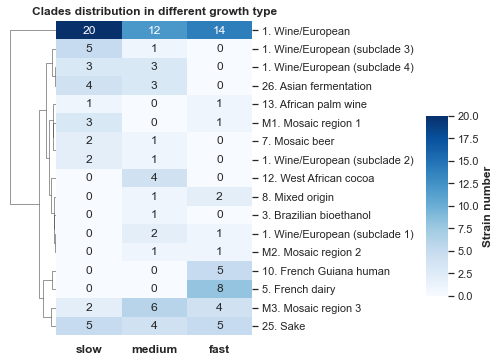

In [122]:
# check the different growth type strains' clade distribution
df_growth_type_clade=pd.DataFrame(index=check_cladelist)
df_growth_type_clade['slow']=df_strain_info.loc[slow_strainlist,'nature_clade'].value_counts()
df_growth_type_clade['medium']=df_strain_info.loc[medium_strainlist,'nature_clade'].value_counts()
df_growth_type_clade['fast']=df_strain_info.loc[fast_strainlist,'nature_clade'].value_counts()
# df_growth_type_clade['total']=df_growth_type_clade.sum(axis=1)
# fill nan with 0
df_growth_type_clade=df_growth_type_clade.fillna(0)
# remove all 0 rows
df_growth_type_clade=df_growth_type_clade.loc[(df_growth_type_clade!=0).any(axis=1)]

# plot cluster map for df_growth_type_clade
ax=sns.clustermap(data=df_growth_type_clade,
                  figsize=(6,5),
                metric='euclidean',
                method='ward',
                cmap='Blues',
                xticklabels=True,
                yticklabels=True,
                dendrogram_ratio=(.2,0),   
                # show values in each cell
                annot=True,
                fmt='.0f',
                # vmin=0,
                # do not calculate dendrogram for columns
                col_cluster=False,
                )

# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('Strain number',weight='bold',fontsize=12)
# set location of colorbar
cbar.set_position([1, .2, .05, .5])
# set xticklabels order as slow, medium, fast
ax.ax_heatmap.set_xticklabels(['slow','medium','fast'],rotation=0,fontsize=12,weight='bold')
# set title
ax.ax_heatmap.set_title('Clades distribution in different growth type',fontsize=12,weight='bold')
plt.show()

In [148]:
df_growth_type_clade.to_csv(r'code/7.transcriptomics_ssGEMs_analysis/output/df_growth_types_clade_count.csv')

In [152]:
df_growth_type_pathway_mean_corr=pd.DataFrame(index=pathway_rxn_dict.keys())
for growth_type in df_growth_type_corr_tpm_flux.columns:
    df_growth_type_pathway_mean_corr[growth_type]=calculate_pathway_tmp_flux_corr(pathway_rxn_dict,df_growth_type_corr_tpm_flux[growth_type])

# remove rows with all Nan value
df_growth_type_pathway_mean_corr=df_growth_type_pathway_mean_corr.fillna(0)

# remove rows with all value <=0.1
# df_growth_type_pathway_mean_corr=df_growth_type_pathway_mean_corr[(df_growth_type_pathway_mean_corr>0.1).all(axis=1)]

# only keep rows with at least one value >0.2
df_growth_type_pathway_mean_corr=df_growth_type_pathway_mean_corr[(df_growth_type_pathway_mean_corr>0).any(axis=1)]
df_growth_type_pathway_mean_corr

C:\Users\wangh\AppData\Local\Temp\ipykernel_32112\3298631080.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_pathway_mean_corr=pd.Series()
C:\Users\wangh\AppData\Local\Temp\ipykernel_32112\3298631080.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_pathway_mean_corr=pd.Series()
C:\Users\wangh\AppData\Local\Temp\ipykernel_32112\3298631080.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_pathway_mean_corr=pd.Series()


,slow,medium,fast
"Alanine, aspartate and glutamate metabolism",0.109144,0.294228,0.244713
Arginine biosynthesis,0.507106,0.271238,0.127705
Biosynthesis of unsaturated fatty acids,0.196296,0.256938,0.136879
Citrate cycle (TCA cycle),0.562680,0.179432,0.475560
Cysteine and methionine metabolism,0.369486,0.102476,0.231952
Glycerolipid metabolism,0.299055,0.502832,0.253325
Glycerophospholipid metabolism,0.473059,0.492367,0.533031
"Glycine, serine and threonine metabolism",0.415343,0.375616,0.253202
Glycolysis / gluconeogenesis,0.501875,0.544250,0.554582
Inositol phosphate metabolism,0.115255,0.241145,0.098079


In [150]:
# save df_growth_type_pathway_mean_corr
df_growth_type_pathway_mean_corr.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_growth_type_pathway_mean_pearson.csv')

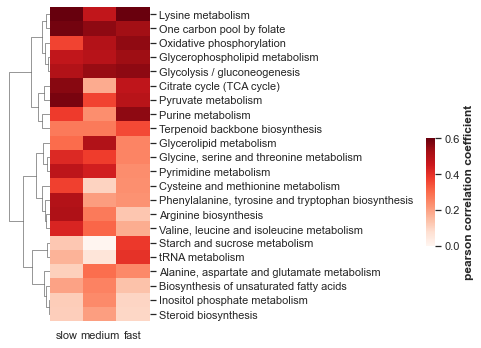

In [153]:
# plot heatmap for df_growth_type_pathway_mean_corr
# set cbar values range from -0.8 to 0.8
sns.clustermap(data=df_growth_type_pathway_mean_corr,
               figsize=(6,5),
               vmin=0,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(.3,0),
               col_cluster=False
               )

# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
# set location of colorbar
cbar.set_position([1, .3, .02, .30])
plt.show()

In [145]:
df_growth_type_pathway_mean_corr.describe()

,slow,medium,fast
count,22.000000,22.000000,22.000000
mean,0.370261,0.312451,0.341485
std,0.170415,0.158825,0.171165
min,0.109144,0.000000,0.095500
25%,0.215283,0.213764,0.227864
50%,0.396536,0.283397,0.303980
75%,0.501069,0.464854,0.519649
max,0.603577,0.554140,0.601170
